In [1]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 파일 경로 및 내용을 이용한 데이터프레임 만들기

In [7]:
path = '/content/drive/MyDrive/제로베이스_코랩/Face Mask Dataset'
dataset = {
    'image_path' : [],
    'mask_status' : [],
    'where' : []
}

for where in os.listdir(path):
    for status in os.listdir(path + '/' + where):
        for image in glob.glob(path + where  + '/' + status + '/' + '*.png'):
            dataset['image_path'].append(image)
            dataset['mask_status'].append(status)
            dataset['where'].append(where)

In [6]:
dataset

{'image_path': [], 'mask_status': [], 'where': []}

In [ ]:
dataset = pd.DataFrame(dataset)
dataset

,image_path,mask_status,where
0,./data/Face Mask Dataset/Test/WithMask\1163.png,WithMask,Test
1,./data/Face Mask Dataset/Test/WithMask\1174.png,WithMask,Test
2,./data/Face Mask Dataset/Test/WithMask\1175.png,WithMask,Test
3,./data/Face Mask Dataset/Test/WithMask\1203.png,WithMask,Test
4,./data/Face Mask Dataset/Test/WithMask\1361.png,WithMask,Test
...,...,...,...
11787,./data/Face Mask Dataset/Validation/WithoutMas...,WithoutMask,Validation
11788,./data/Face Mask Dataset/Validation/WithoutMas...,WithoutMask,Validation
11789,./data/Face Mask Dataset/Validation/WithoutMas...,WithoutMask,Validation
11790,./data/Face Mask Dataset/Validation/WithoutMas...,WithoutMask,Validation


With mask : 5909
Without mask : 5883


<Axes: xlabel='mask_status', ylabel='count'>

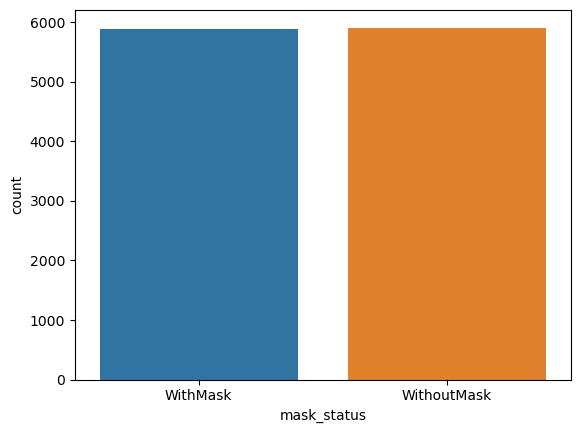

In [ ]:
print('With mask :', dataset.value_counts('mask_status')[0])
print('Without mask :', dataset.value_counts('mask_status')[1])

sns.countplot(x=dataset['mask_status'])

### 랜덤하게 이미지 확인

In [ ]:
# !pip install opencv_python

   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.2/38.6 MB 5.1 MB/s eta 0:00:08
   ---------------------------------------- 0.3/38.6 MB 4.8 MB/s eta 0:00:09
    --------------------------------------- 0.6/38.6 MB 3.4 MB/s eta 0:00:12
    --------------------------------------- 0.8/38.6 MB 3.5 MB/s eta 0:00:11
   - -------------------------------------- 1.1/38.6 MB 3.9 MB/s eta 0:00:10
   - -------------------------------------- 1.4/38.6 MB 4.2 MB/s eta 0:00:09
   - -------------------------------------- 1.8/38.6 MB 4.7 MB/s eta 0:00:08
   -- ------------------------------------- 2.0/38.6 MB 4.8 MB/s eta 0:00:08
   -- ------------------------------------- 2.5/38.6 MB 5.3 MB/s eta 0:00:07
   --- ------------------------------------ 2.9/38.6 MB 5.8 MB/s eta 0:00:07
   --- ------------------------------------ 3.5/38.6 MB 6.3 MB/s eta 0:00:06
   --- ------

In [ ]:
import cv2

print(cv2.__version__)

4.9.0


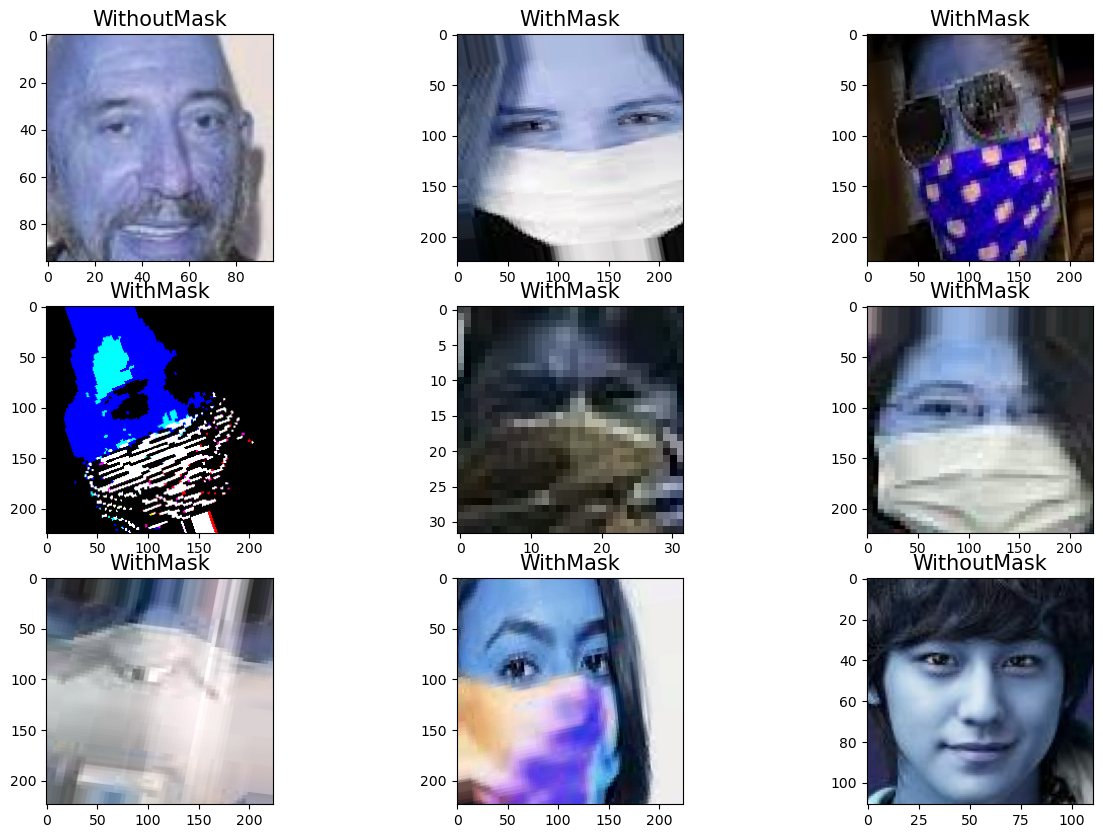

In [ ]:
plt.figure(figsize=(15, 10))
for i in range(9):
    random = np.random.randint(1, len(dataset))
    plt.subplot(3, 3, i +1)
    plt.imshow(cv2.imread(dataset.loc[random, 'image_path']))
    plt.title(dataset.loc[random, 'mask_status'], size=15)

plt.show()

### 파일 경로에 따라 Train, Test, Validation으로 분할

In [ ]:
train_df = dataset[dataset['where'] == 'Train']
test_df = dataset[dataset['where'] == 'Test']
valid_df = dataset[dataset['where'] == 'Validation']

valid_df.head()

,image_path,mask_status,where
10992,./data/Face Mask Dataset/Validation/WithMask\1...,WithMask,Validation
10993,./data/Face Mask Dataset/Validation/WithMask\1...,WithMask,Validation
10994,./data/Face Mask Dataset/Validation/WithMask\1...,WithMask,Validation
10995,./data/Face Mask Dataset/Validation/WithMask\1...,WithMask,Validation
10996,./data/Face Mask Dataset/Validation/WithMask\1...,WithMask,Validation


### 각 데이터의 분포도 확인

Text(0.5, 1.0, 'Validation Data')

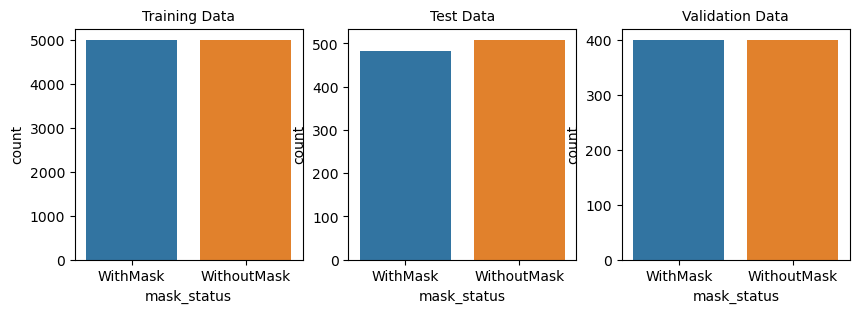

In [ ]:
plt.figure(figsize=(10, 3))

plt.subplot(1, 3, 1)
sns.countplot(x=train_df['mask_status'])
plt.title('Training Data', size = 10)

plt.subplot(1, 3, 2)
sns.countplot(x=test_df['mask_status'])
plt.title('Test Data', size = 10)

plt.subplot(1, 3, 3)
sns.countplot(x=valid_df['mask_status'])
plt.title('Validation Data', size = 10)

### 인덱스 정리

In [ ]:
train_df = train_df.reset_index().drop('index', axis=1)
train_df

,image_path,mask_status,where
0,./data/Face Mask Dataset/Train/WithMask\10.png,WithMask,Train
1,./data/Face Mask Dataset/Train/WithMask\100.png,WithMask,Train
2,./data/Face Mask Dataset/Train/WithMask\1004.png,WithMask,Train
3,./data/Face Mask Dataset/Train/WithMask\1005.png,WithMask,Train
4,./data/Face Mask Dataset/Train/WithMask\1006.png,WithMask,Train
...,...,...,...
9995,./data/Face Mask Dataset/Train/WithoutMask\993...,WithoutMask,Train
9996,./data/Face Mask Dataset/Train/WithoutMask\994...,WithoutMask,Train
9997,./data/Face Mask Dataset/Train/WithoutMask\995...,WithoutMask,Train
9998,./data/Face Mask Dataset/Train/WithoutMask\996...,WithoutMask,Train


### 데이터 전처리

In [ ]:
data = []
image_size = 150

for i in range(len(train_df)):
    # 이미지를 불러오고 그레이스케일
    img_array = cv2.imread(train_df['image_path'][i], cv2.IMREAD_GRAYSCALE)
    # 이미지 사이즈 변경
    new_image_array = cv2.resize(img_array, (image_size, image_size))

    # 마스크 유무에 따라 이미지에 라벨달기
    if train_df['mask_status'][i] == 'WithMask':
        data.append([new_image_array, 1])
    else:
        data.append([new_image_array, 0])

In [ ]:
data[0]

[array([[238, 238, 238, ..., 199, 199, 199],
        [238, 238, 238, ..., 197, 197, 197],
        [237, 237, 238, ..., 194, 194, 195],
        ...,
        [236, 236, 236, ..., 151, 151, 152],
        [235, 235, 235, ..., 151, 152, 152],
        [235, 235, 235, ..., 151, 152, 152]], dtype=uint8),
 1]

### 데이터 섞기

In [ ]:
np.random.shuffle(data)
data[0]

[array([[220, 221, 223, ...,  24,  29,  34],
        [220, 221, 223, ...,  20,  24,  30],
        [220, 221, 222, ...,  17,  20,  25],
        ...,
        [220, 218, 217, ...,  35,  28,  30],
        [219, 218, 216, ...,  43,  29,  28],
        [219, 217, 216, ...,  49,  30,  28]], dtype=uint8),
 0]

### 이미지 확인

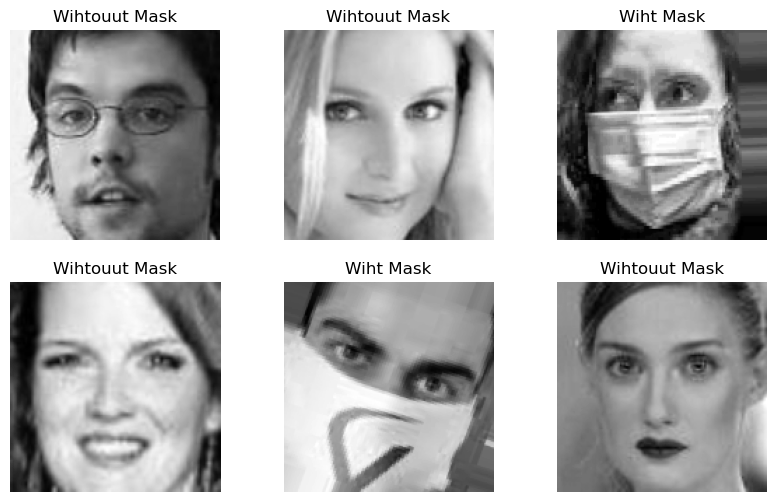

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(10, 6))

for row in range(2):
    for col in range(3):
        image_index = row * 100 + col

        ax[row, col].axis('off')
        ax[row, col].imshow(data[image_index][0], cmap = 'gray')

        if data[image_index][1] == 0:
            ax[row, col].set_title('Wihtouut Mask')
        else:
            ax[row, col].set_title('Wiht Mask')

### X, y 데이터 분리

In [ ]:
X = []
y = []

for image in data:
    X.append(image[0])
    y.append(image[1])

X = np.array(X)
y = np.array(y)

### 트레인 데이터 나누기(강의상 트레인 데이터만 사용)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=0.2,
                                                  random_state=13)

### 모델 만들기

In [ ]:
model = models.Sequential(
    [
        layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
                      activation='relu', input_shape=(150, 150, 1)),
        layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        layers.Conv2D(64, (2, 2), padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(1000, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ]
)

### Compile

### BinaryCrossentropy
- y값이 (ex. 0,1) 인 이진 분류기를 훈련할 때 자주 사용되는 손실 함수 (multi-label classification)
- 활성화 함수 : sigmoid 사용 (출력값이 0과 1사이의 값)

In [ ]:
model.compile(
    optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

### 학습

In [ ]:
X_train = X_train.reshape(len(X_train), X_train.shape[1], X_train.shape[2], 1)
                        # reshape(훈련용데이터의 갯수, 150, 150, 1)
# X_train = X_train.reshape(-1, 150, 150, 1) : 위와 같은 의미의 코딩
X_val = X_val.reshape(len(X_val), X_val.shape[1], X_val.shape[2], 1)
history = model.fit(X_train, y_train, epochs=4, batch_size=32)

Epoch 1/4
250/250 [==============================] - 204s 812ms/step - loss: 19.8293 - accuracy: 0.8951
Epoch 2/4
250/250 [==============================] - 239s 957ms/step - loss: 0.1201 - accuracy: 0.9721
Epoch 3/4
250/250 [==============================] - 261s 1s/step - loss: 0.0739 - accuracy: 0.9783
Epoch 4/4
250/250 [==============================] - 214s 857ms/step - loss: 0.0283 - accuracy: 0.9900


### loss와 acc 확인

In [ ]:
model.evaluate(X_val, y_val)

63/63 [==============================] - 5s 78ms/step - loss: 0.1536 - accuracy: 0.9725


[0.15359258651733398, 0.9725000262260437]

In [ ]:
prediction = (model.predict(X_val) > 0.5).astype('int32')

print(classification_report(y_val, prediction))
print(confusion_matrix(y_val, prediction))

63/63 [==============================] - 5s 78ms/step
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       996
           1       0.97      0.98      0.97      1004

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000

[[963  33]
 [ 22 982]]


### 틀린 값 확인 및 시각화

In [ ]:
wrong_result = []

for n in range(0, len(y_val)):
    if prediction[n] != y_val[n]:
        wrong_result.append(n)

len(wrong_result)

55

c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


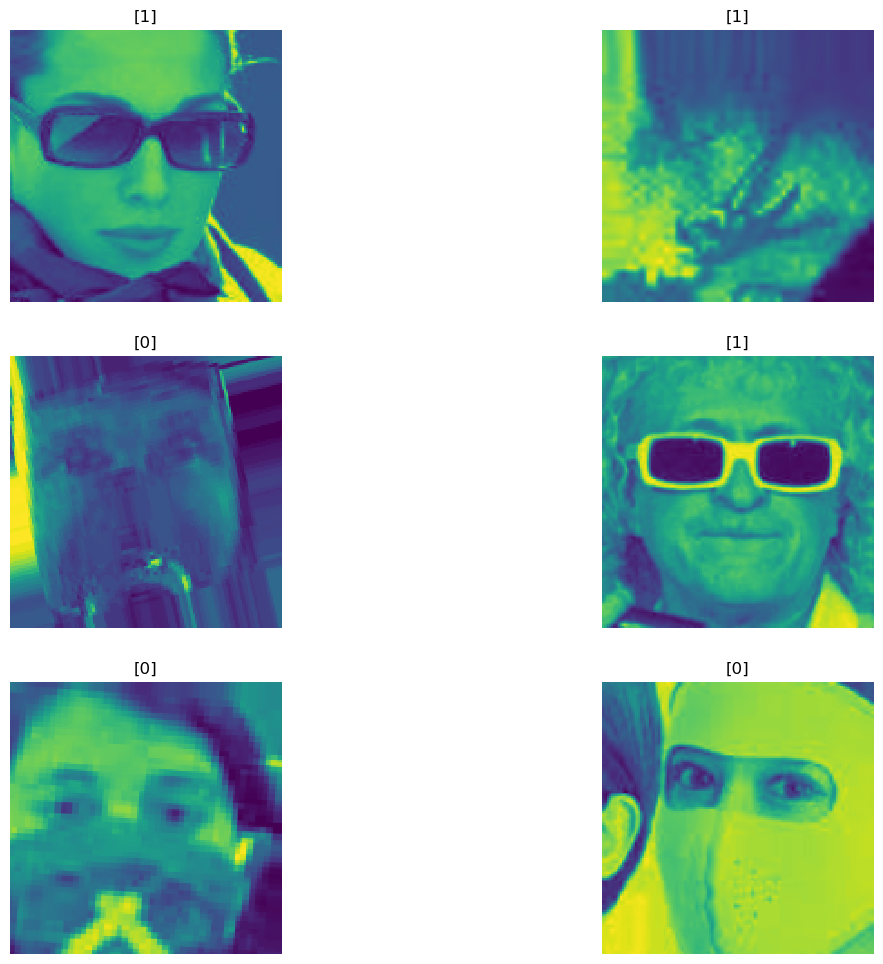

In [ ]:
import random

samples = random.choices(population=wrong_result, k=6)

plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(3, 2, idx + 1)
    plt.imshow(X_val[n].reshape(150, 150), interpolation='nearest')
    plt.title(prediction[n])
    plt.axis('off')

plt.show()